In [54]:
import pandas as pd
df = pd.read_csv("../data/eda_b4s_clean.csv")
# Sicherstellen, dass die Spalte numerisch ist
df["Nettolast_P_kW"] = pd.to_numeric(df["Nettolast_P_kW"], errors="coerce")

#head der bereinigten Daten anzeigen
df.head(5)  # Ausgabe der ersten Zeilen des bereinigten Data


import pandas as pd

# Daten einlesen
df = pd.read_csv("../data/eda_b4s_clean.csv")

# Sicherstellen, dass die Spalte numerisch ist
df["Nettolast_P_kW"] = pd.to_numeric(df["Nettolast_P_kW"], errors="coerce")

# Z-Score-Grenzen definieren (2.5 statt 3)
mean = df["Nettolast_P_kW"].mean()
std = df["Nettolast_P_kW"].std()
lower = mean - 2.5 * std
upper = mean + 2.5 * std

# Ausreißer entfernen
df_ml_ready = df[(df["Nettolast_P_kW"] >= lower) & (df["Nettolast_P_kW"] <= upper)]

# Datei speichern
df_ml_ready.to_csv("../data/eda_b4s_clean_zscore.csv", index=False)

# Ausgabe
print(f"Zulässiger Bereich: {lower:.2f} bis {upper:.2f}")
print(f"Entfernte Zeilen: {len(df) - len(df_ml_ready)}")
print(f"Verbleibende Zeilen: {len(df_ml_ready)}")

df = df_ml_ready



Zulässiger Bereich: -1.69 bis 105.01
Entfernte Zeilen: 274
Verbleibende Zeilen: 26387


In [56]:
#head der bereinigten Daten anzeigen
df.head(5)  # Ausgabe der ersten Zeilen des bereinigten DataFrames

,time,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,Nettolast_P_kW,Nettolast_Q_kvar,Holiday,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,hour,weekday,is_weekend
0,2020-03-02 23:15:00,30014,0,2612,0,0,8200,30.014,-5.588,0,244.0,5.925,11.6,0.0,0.100,3.450,23,0,0
1,2020-03-02 23:30:00,27356,0,2538,0,0,8322,27.356,-5.784,0,244.0,5.700,11.6,0.0,0.100,3.300,23,0,0
2,2020-03-02 23:45:00,25930,0,2544,0,0,8302,25.930,-5.758,0,245.0,5.750,11.6,0.0,0.100,3.275,23,0,0
3,2020-03-03 00:00:00,24318,0,2432,0,0,8296,24.318,-5.864,0,245.0,5.800,11.6,0.0,0.100,3.250,0,1,0
4,2020-03-03 00:15:00,24300,0,2460,0,0,8082,24.300,-5.622,0,245.0,5.850,11.9,0.0,0.025,3.225,0,1,0


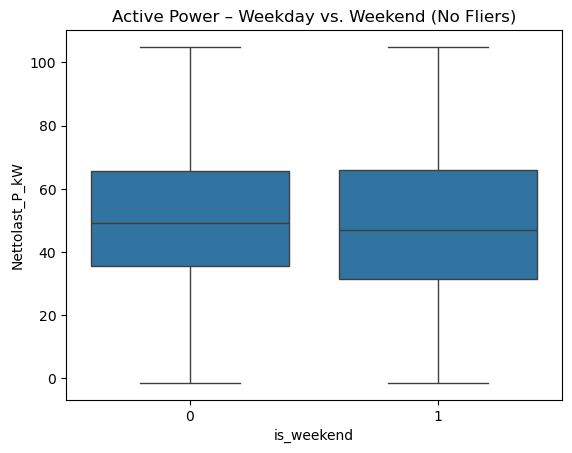

In [51]:
# Daten einlesen
df = pd.read_csv("../data/eda_b4s_clean_zscore_strict.csv")

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="is_weekend", y="Nettolast_P_kW", showfliers=True)
plt.title("Active Power – Weekday vs. Weekend (No Fliers)")
plt.show()

In [38]:
print(df["Nettolast_P_kW"].dtype)


float64


In [39]:
outliers = df[(df["Nettolast_P_kW"] < lower) | (df["Nettolast_P_kW"] > upper)]
print(f"Zeilen außerhalb des IQR-Bereichs: {len(outliers)}")
print(outliers[["time", "Nettolast_P_kW"]].sort_values("Nettolast_P_kW"))


Zeilen außerhalb des IQR-Bereichs: 0
Empty DataFrame
Columns: [time, Nettolast_P_kW]
Index: []


In [40]:
print("5 größte Werte:")
print(df.sort_values("Nettolast_P_kW", ascending=False).head())

print("\n5 kleinste Werte:")
print(df.sort_values("Nettolast_P_kW").head())


5 größte Werte:
                      time  feature_01  feature_02  feature_03  feature_04  \
2938   2020-04-02 18:15:00      113852           0        5988           0   
25912  2020-11-28 18:30:00      113688           0        4820           0   
6570   2020-05-10 18:30:00      113904         240        6164         360   
22393  2020-10-22 18:00:00      113600           0        5836           0   
1232   2020-03-15 19:15:00      113568           0        5768           0   

       feature_05  feature_06  Nettolast_P_kW  Nettolast_Q_kvar  Holiday  \
2938            0       20996         113.852           -15.008        0   
25912           0       20840         113.688           -16.020        0   
6570            0       18456         113.664           -11.932        0   
22393           0       20188         113.600           -14.352        0   
1232            0       20584         113.568           -14.816        0   

       feature_08  feature_09  feature_10  feature_11  fea

In [34]:
print(f"IQR-Bereich: [{Q1 - 1.5*IQR:.2f}, {Q3 + 1.5*IQR:.2f}]")
print(f"Min: {df['Nettolast_P_kW'].min()}, Max: {df['Nettolast_P_kW'].max()}")


IQR-Bereich: [-13.42, 113.86]
Min: -12.324, Max: 113.852


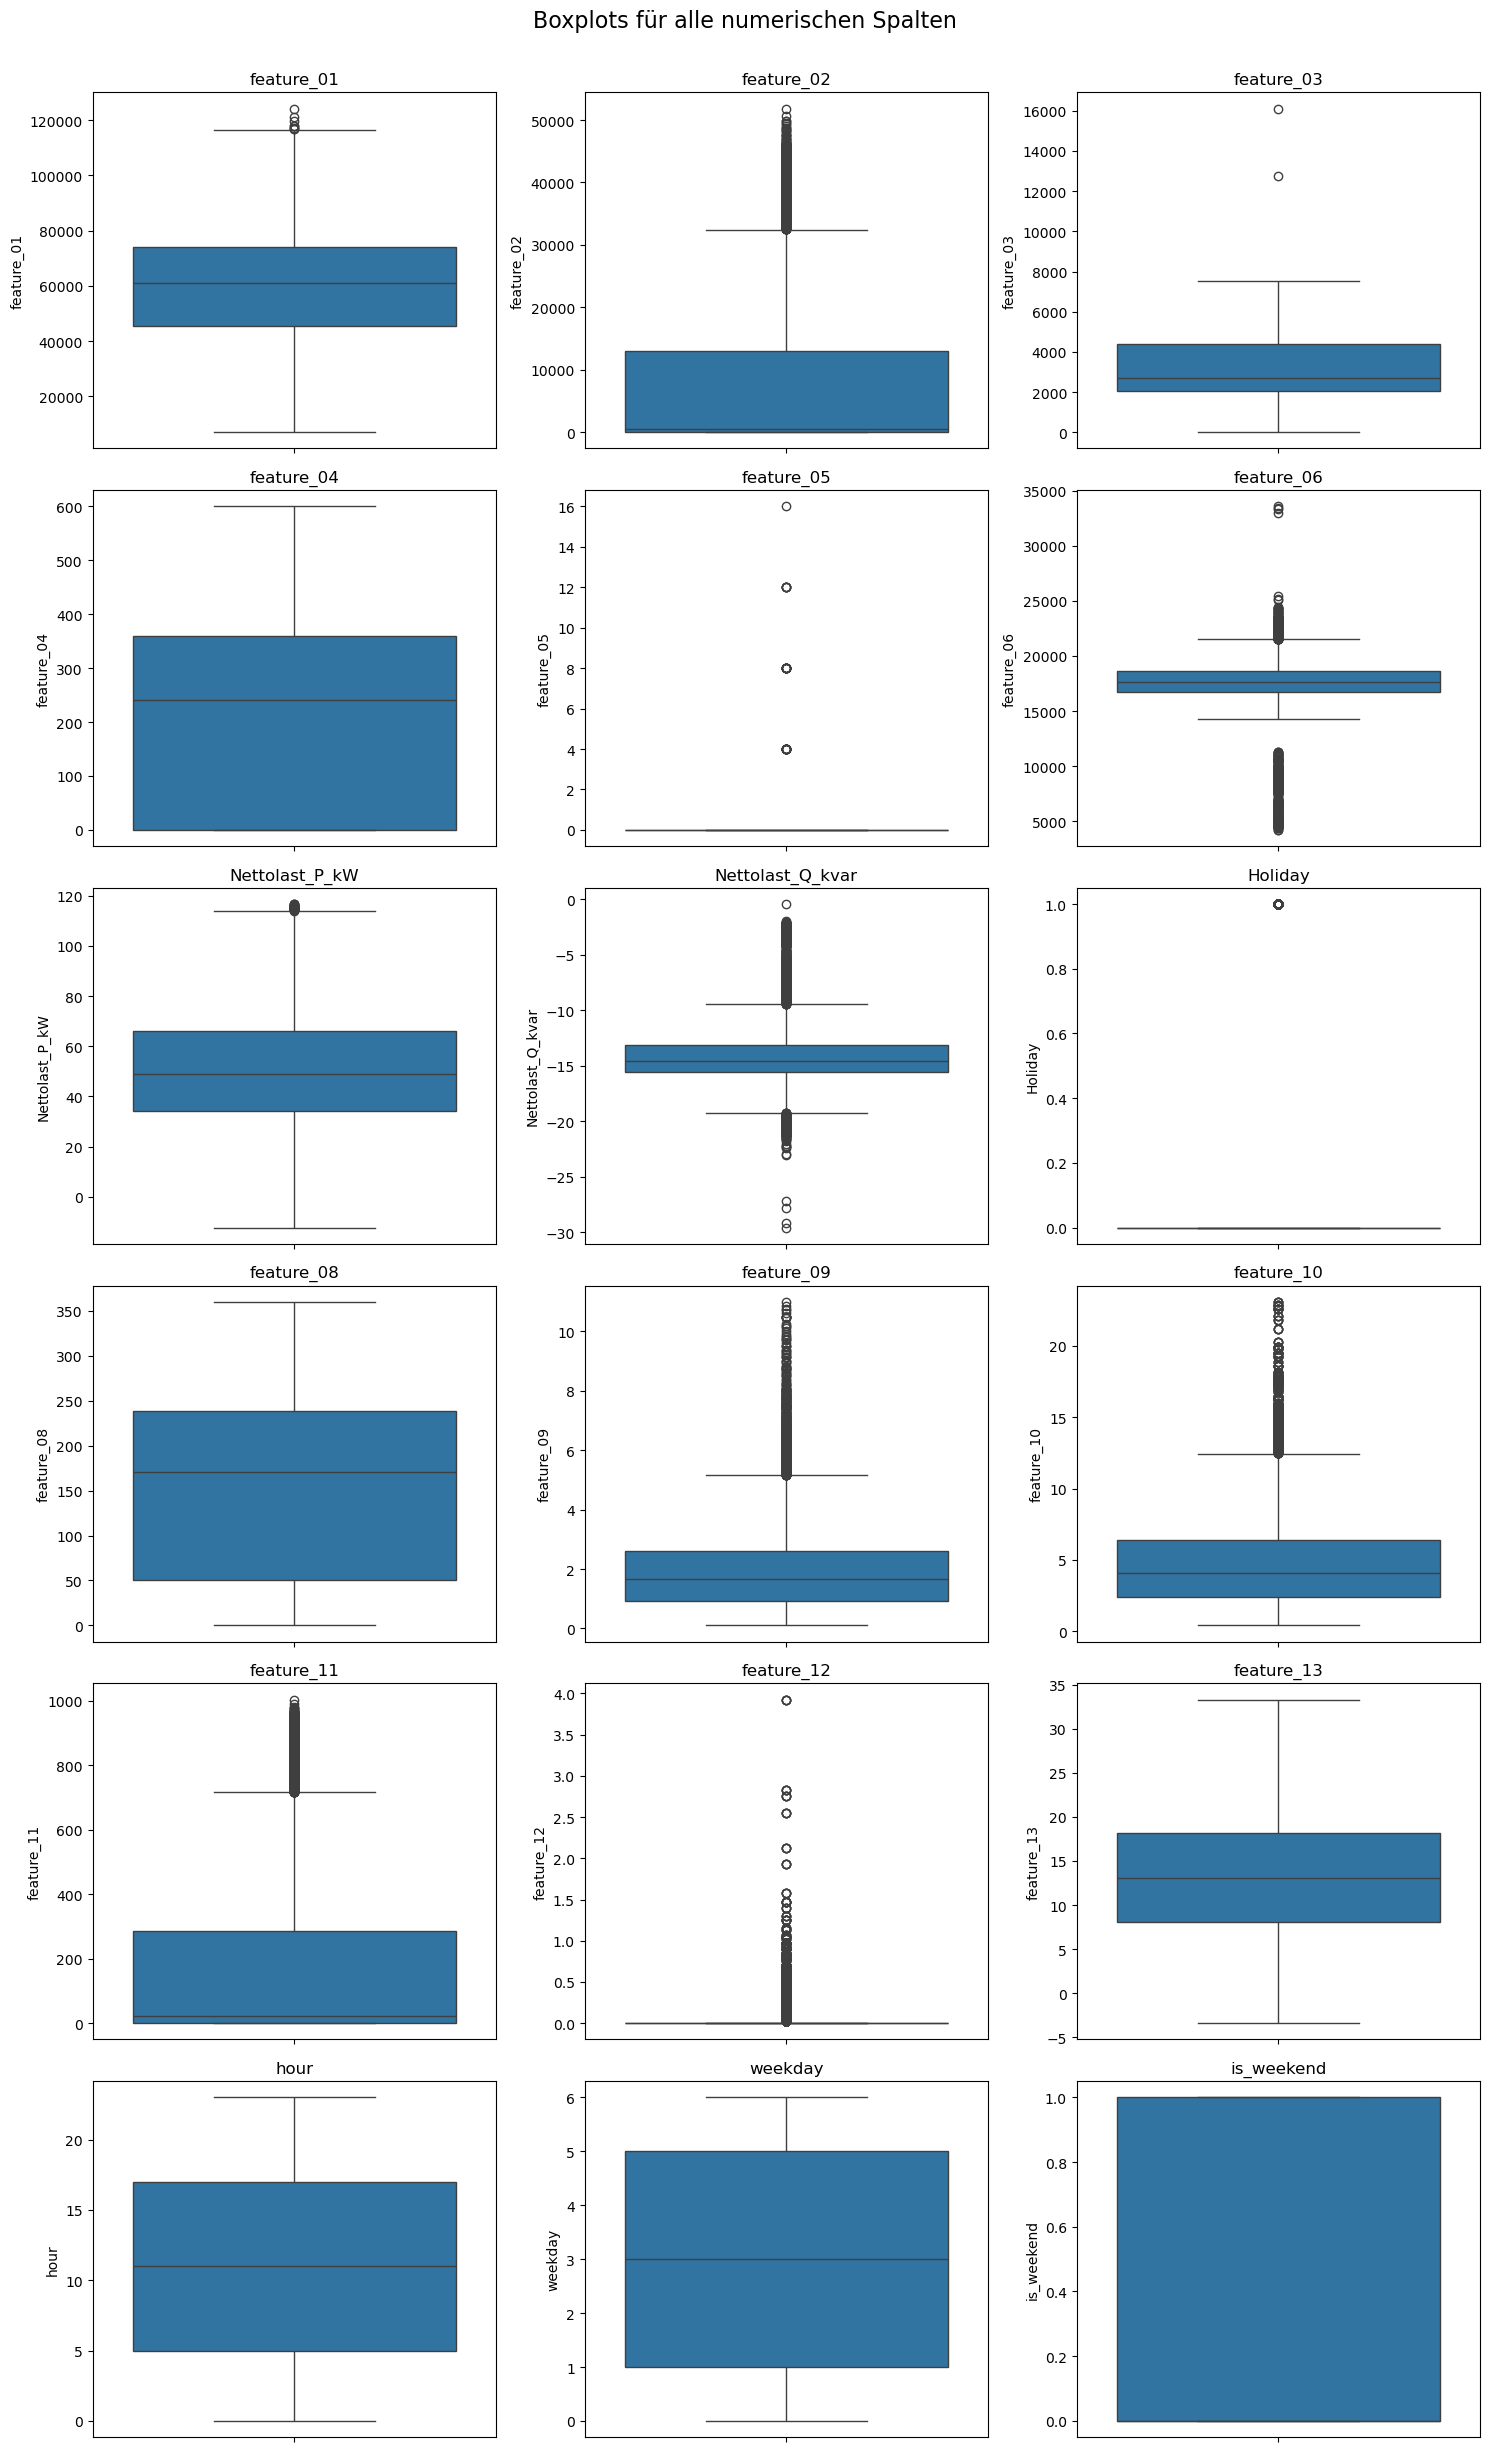

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
df = pd.read_csv("../data/eda_b4s_clean.csv")

# Nur numerische Spalten auswählen
numeric_cols = df.select_dtypes(include="number").columns

# Anzahl der Plots pro Zeile
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Plot erzeugen
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots für alle numerischen Spalten", fontsize=16, y=1.02)
plt.show()


In [13]:
print(df.shape)
print(df.columns)
df.info()
df.describe()


(17488, 19)
Index(['time', '1-1:1290*255', '1-1:2290*255', '1-1:5290*255', '1-1:6290*255',
       '1-1:7290*255', '1-1:8290*255', 'Nettolast_P_kW', 'Nettolast_Q_kvar',
       'Holiday', 'dkl010h0', 'fkl010h0', 'fkl010h1', 'gre000h0', 'rre150h0',
       'tre200h0', 'hour', 'weekday', 'is_weekend'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17488 entries, 0 to 17487
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              17488 non-null  object 
 1   1-1:1290*255      17488 non-null  int64  
 2   1-1:2290*255      17488 non-null  int64  
 3   1-1:5290*255      17488 non-null  int64  
 4   1-1:6290*255      17488 non-null  int64  
 5   1-1:7290*255      17488 non-null  int64  
 6   1-1:8290*255      17488 non-null  int64  
 7   Nettolast_P_kW    17488 non-null  float64
 8   Nettolast_Q_kvar  17488 non-null  float64
 9   Holiday           17488 non-null  int64  
 10  d

,1-1:1290*255,1-1:2290*255,1-1:5290*255,1-1:6290*255,1-1:7290*255,1-1:8290*255,Nettolast_P_kW,Nettolast_Q_kvar,Holiday,dkl010h0,fkl010h0,fkl010h1,gre000h0,rre150h0,tre200h0,hour,weekday,is_weekend
count,17488.000000,17488.000000,17488.000000,17488.000000,17488.0,17488.000000,17488.000000,17488.000000,17488.000000,17488.000000,17488.000000,17488.000000,17488.000000,17488.0,17488.000000,17488.000000,17488.000000,17488.000000
mean,58669.858417,3595.779963,3284.551464,155.942360,0.0,17705.776990,55.074078,-14.265283,0.020242,146.975011,1.586831,3.851006,80.613892,0.0,12.319247,11.488564,3.014353,0.283966
std,20434.658714,6237.665040,1291.312491,184.904568,0.0,1298.421867,20.030402,1.729415,0.140833,100.681819,1.047576,2.370398,127.226147,0.0,6.618428,7.660715,1.993261,0.450933
min,21680.000000,0.000000,1232.000000,0.000000,0.0,14740.000000,13.580000,-19.072000,0.000000,0.000000,0.100000,0.400000,0.000000,0.0,-3.400000,0.000000,0.000000,0.000000
25%,43075.000000,0.000000,2060.000000,0.000000,0.0,16724.000000,39.807000,-15.444000,0.000000,49.000000,0.750000,2.000000,0.000000,0.0,7.500000,4.000000,1.000000,0.000000
50%,58942.000000,0.000000,2756.000000,0.000000,0.0,17520.000000,52.766000,-14.492000,0.000000,146.000000,1.300000,3.200000,1.000000,0.0,12.450000,12.000000,3.000000,0.000000
75%,73406.000000,4800.000000,4568.000000,360.000000,0.0,18548.000000,68.980000,-12.939000,0.000000,225.000000,2.200000,5.300000,125.000000,0.0,17.125000,19.000000,5.000000,1.000000
max,115760.000000,32400.000000,7520.000000,600.000000,0.0,21504.000000,111.796000,-9.612000,1.000000,360.000000,5.000000,11.200000,469.000000,0.0,31.450000,23.000000,6.000000,1.000000


In [14]:
# # Ausreißer anhand des IQR entfernen
# Q1 = df["Nettolast_P_kW"].quantile(0.25)
# Q3 = df["Nettolast_P_kW"].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5 * IQR
# upper = Q3 + 1.5 * IQR

# df_no_outliers = df[(df["Nettolast_P_kW"] >= lower) & (df["Nettolast_P_kW"] <= upper)]
# print(df_no_outliers.shape)


In [15]:
# # Anzahl der verbleibenden Daten nach dem Entfernen der Ausreißer
# print(f"Anzahl der verbleibenden Datenpunkte: {len(df_no_outliers)}")
# print(f"Anteil der verbleibenden Daten: {len(df_no_outliers) / len(df) * 100:.2f}%")

In [16]:
# # Anzahl der gelöschten Datenpunkte berechnen
# deleted_count = len(df) - len(df_no_outliers)
# deleted_percentage = deleted_count / len(df) * 100

# print(f"Anzahl der gelöschten Datenpunkte: {deleted_count}")
# print(f"Anteil der gelöschten Daten: {deleted_percentage:.2f}%")

In [17]:

df = df_no_outliers

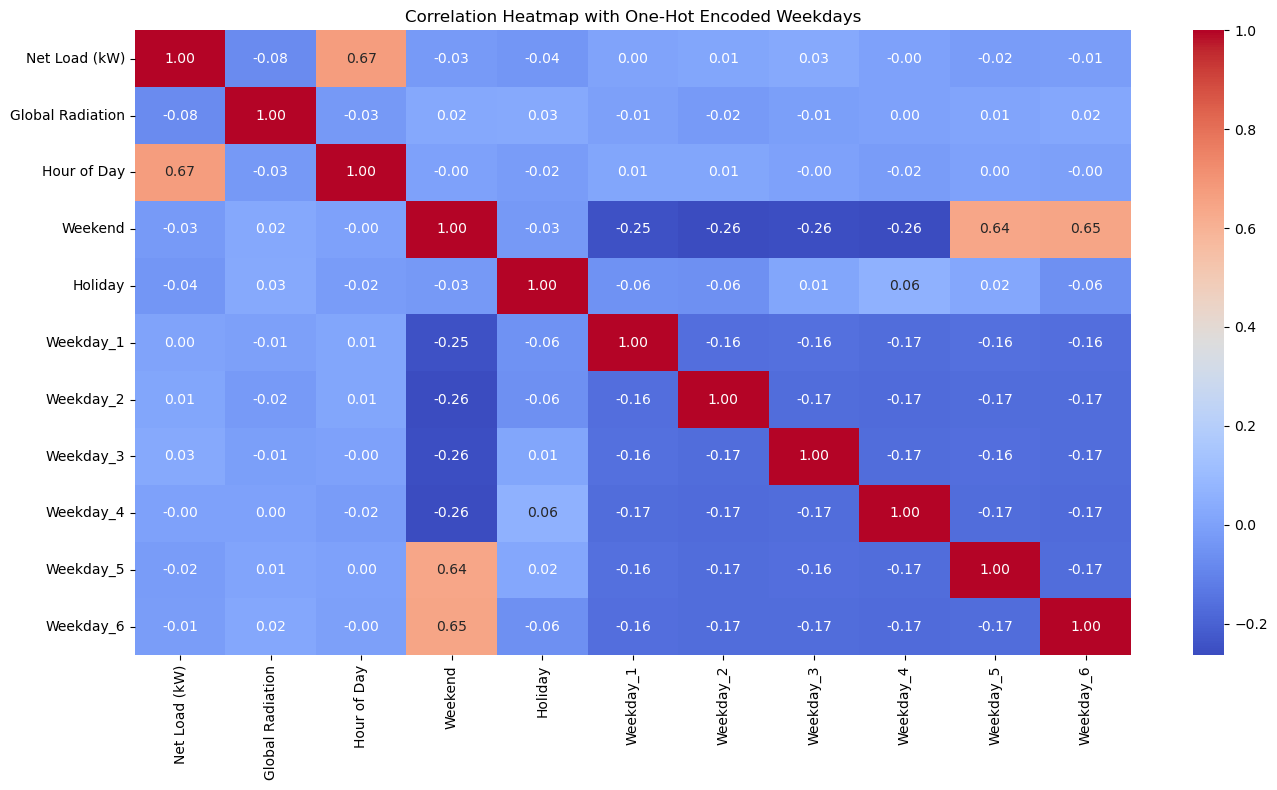

In [18]:
# Nach Kernel-Reset: Daten erneut laden
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV-Datei erneut laden
df = pd.read_csv("../data/eda_b4s_clean.csv", parse_dates=["time"], index_col="time")

# Sicherstellen, dass die relevanten Spalten vorhanden sind
required_columns = ['Nettolast_P_kW', 'gre000h0', 'hour', 'weekday', 'is_weekend', 'Holiday']
df_model = df[required_columns].copy()

# Spalten umbenennen für Lesbarkeit
df_model = df_model.rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'gre000h0': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend'
})

# One-Hot-Encoding für den Wochentag (Weekday)
df_encoded = pd.get_dummies(df_model, columns=['Weekday'], drop_first=True)

# Korrelationsmatrix berechnen
correlation_matrix = df_encoded.corr()

# Heatmap zeichnen
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with One-Hot Encoded Weekdays")
plt.tight_layout()
plt.show()


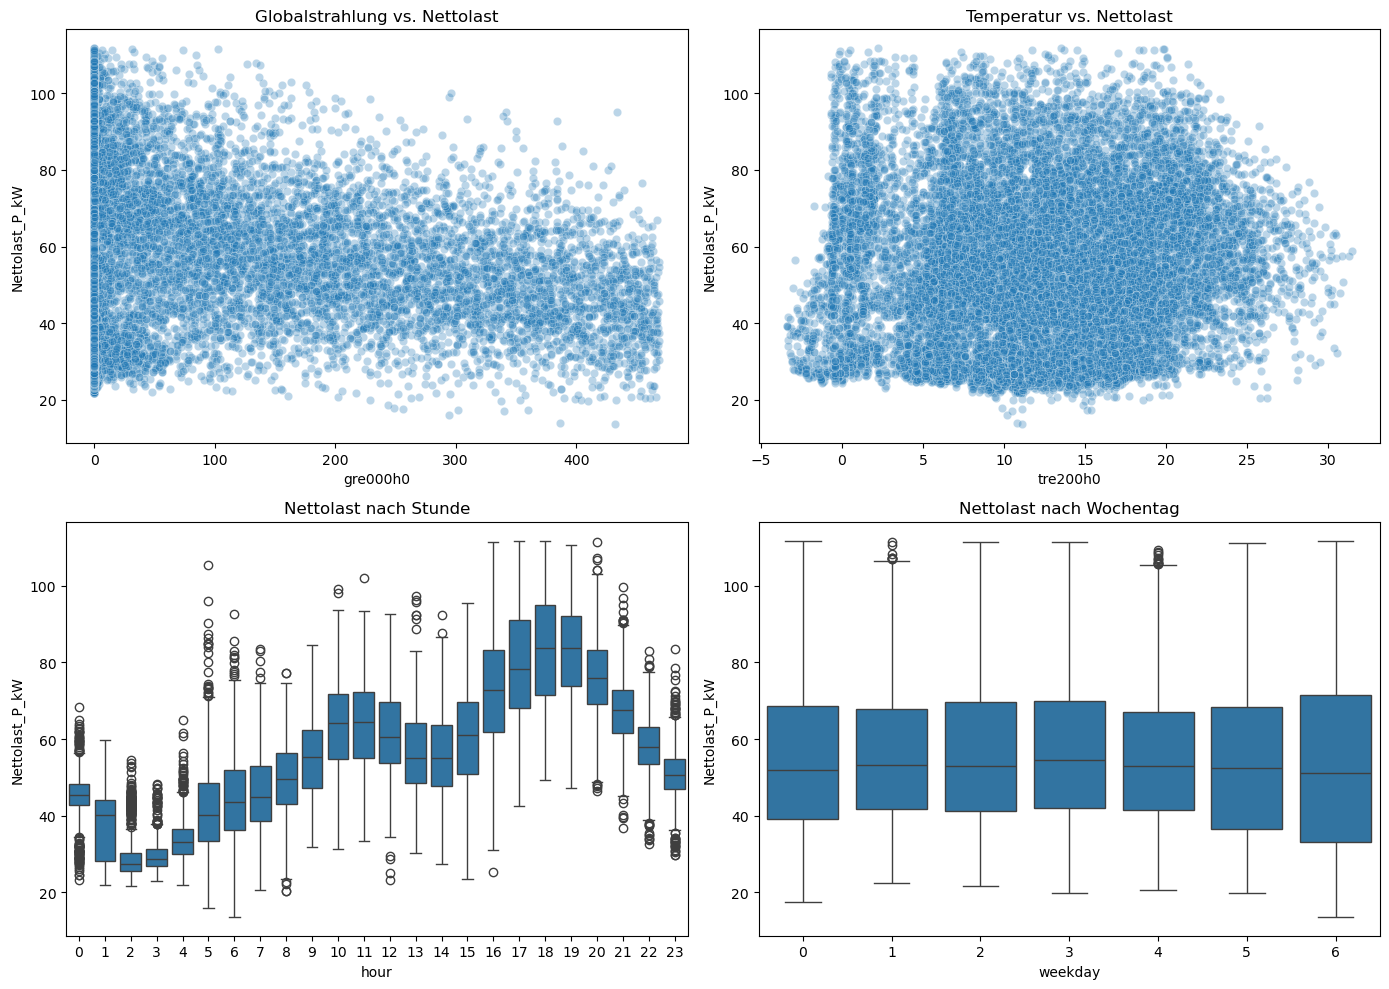

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Einfluss der Wetterdaten auf die Last
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(ax=axes[0, 0], data=df, x="gre000h0", y="Nettolast_P_kW", alpha=0.3)
axes[0, 0].set_title("Globalstrahlung vs. Nettolast")

sns.scatterplot(ax=axes[0, 1], data=df, x="tre200h0", y="Nettolast_P_kW", alpha=0.3)
axes[0, 1].set_title("Temperatur vs. Nettolast")

sns.boxplot(ax=axes[1, 0], data=df, x="hour", y="Nettolast_P_kW")
axes[1, 0].set_title("Nettolast nach Stunde")

sns.boxplot(ax=axes[1, 1], data=df, x="weekday", y="Nettolast_P_kW")
axes[1, 1].set_title("Nettolast nach Wochentag")

plt.tight_layout()
plt.show()

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['time'], df.iloc[:, 1], label=df.columns[1])  # Zweite Spalte
plt.plot(df['time'], df.iloc[:, 2], label=df.columns[2])  # Dritte Spalte
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df.columns[1]} vs. {df.columns[2]} über die Zeit')
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'time'

<Figure size 1400x600 with 0 Axes>

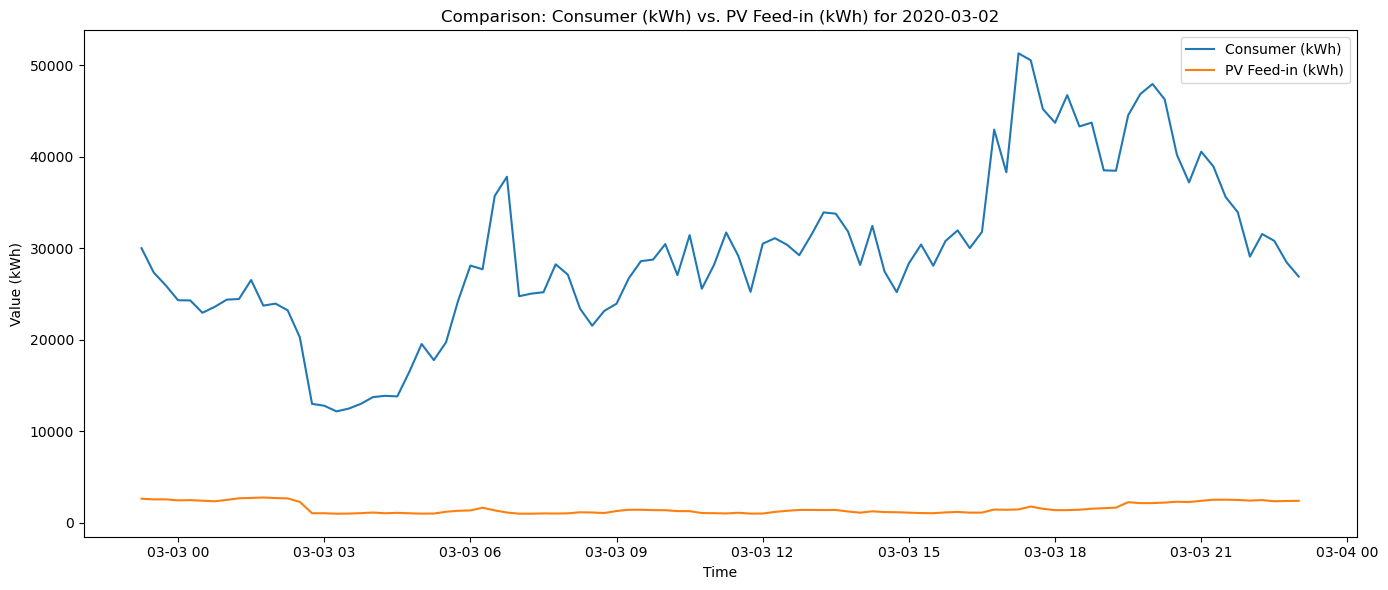

In [ ]:
import matplotlib.pyplot as plt

# Plot comparison of the second column (Consumer) and third column (PV Feed-in) for one day
plt.figure(figsize=(14, 6))
plt.plot(df_day['time'], df_day.iloc[:, 1], label=df_day.columns[1])  # Consumer (kWh)
plt.plot(df_day['time'], df_day.iloc[:, 3], label=df_day.columns[3])  # PV Feed-in (kWh)
plt.xlabel('Time')
plt.ylabel('Value (kWh)')
plt.title(f'Comparison: {df_day.columns[1]} vs. {df_day.columns[3]} for {start_date.date()}')
plt.legend()
plt.tight_layout()
plt.show()

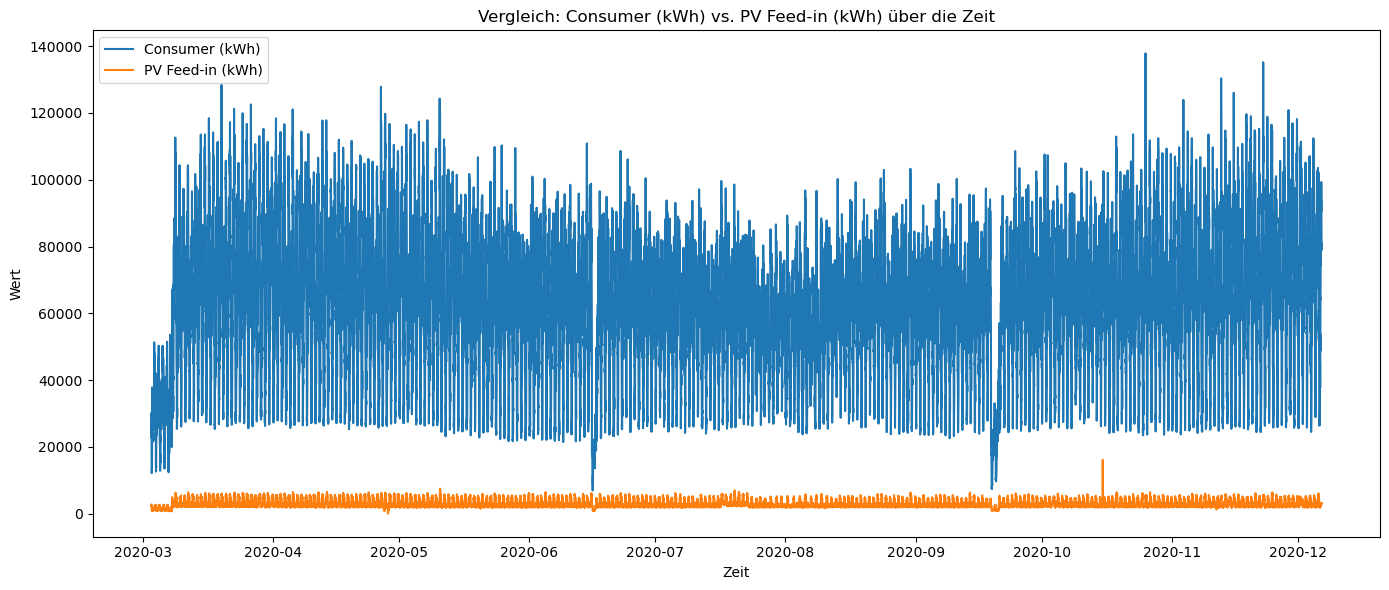

In [ ]:

import matplotlib.pyplot as plt
# Plot the second and third columns over time for comparison
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df.iloc[:, 1], label=df.columns[1])  # Consumer (kWh)
plt.plot(df['time'], df.iloc[:, 2], label=df.columns[2])  # 1-1:2290*255
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Comparison: {df.columns[1]} vs. {df.columns[2]} over Time')
plt.legend()
plt.tight_layout()
plt.show()
df['time'] = pd.to_datetime(df['time'])

# Plot der zweiten und vierten Spalte über die Zeit
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df.iloc[:, 1], label=df.columns[1])
plt.plot(df['time'], df.iloc[:, 3], label=df.columns[3])
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df.columns[1]} vs. {df.columns[3]} über die Zeit')
plt.legend()
plt.tight_layout()
plt.show()

TypeError: float() argument must be a string or a real number, not 'datetime.time'

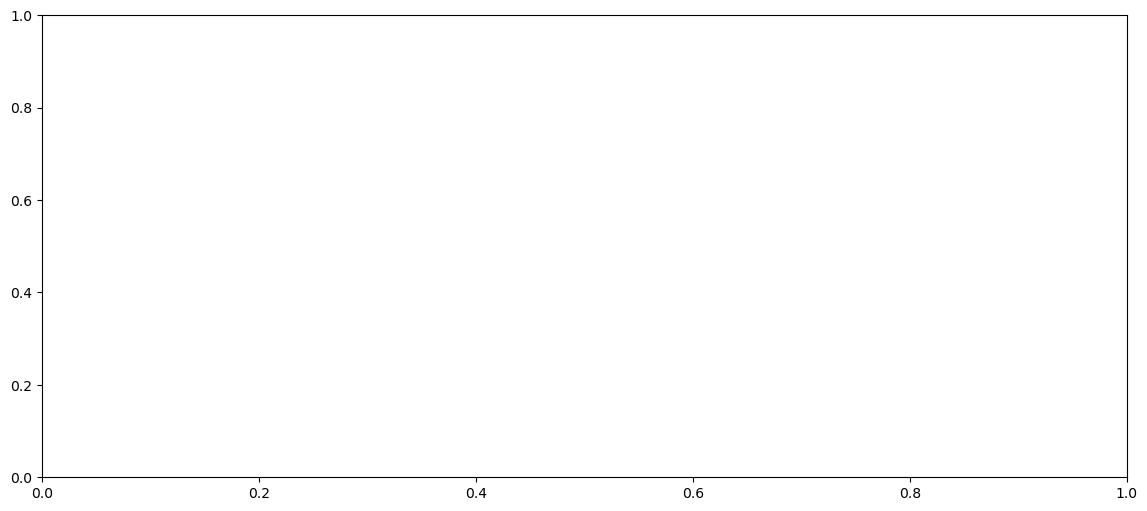

In [ ]:
# Plot-Vergleich NUR für einen Tag (df_day) – x-Achse: Uhrzeit
plt.figure(figsize=(14, 6))
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 1], label=df_day.columns[1])  # Consumer (kWh)
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 2], label=df_day.columns[2])  # 1-1:2290*255
plt.xlabel('Uhrzeit')
plt.ylabel('Value')
plt.title(f'Comparison: {df_day.columns[1]} vs. {df_day.columns[2]} für {start_date.date()}')
plt.legend()
plt.tight_layout()
plt.show()

# Plot der zweiten und vierten Spalte NUR für einen Tag – x-Achse: Uhrzeit
plt.figure(figsize=(14, 6))
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 1], label=df_day.columns[1])
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 3], label=df_day.columns[3])
plt.xlabel('Uhrzeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df_day.columns[1]} vs. {df_day.columns[3]} am {start_date.date()}')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Der Code funktioniert nicht, weil er als R-Zelle (`r`) deklariert ist, aber Python-Code enthält.
# In Jupyter muss die Zelle als Python (`python`) markiert sein, damit Python-Code ausgeführt wird.
# Ändere die Zellen-Kennzeichnung von `r` zu `python`, dann funktioniert der Code.

import matplotlib.pyplot as plt

# Vergleicht die zweite und dritte Spalte für einen Tag (df_day)
plt.figure(figsize=(14, 6))
plt.plot(df_day['time_str'], df_day.iloc[:, 1], label=df_day.columns[1])  # Consumer (kWh)
plt.plot(df_day['time_str'], df_day.iloc[:, 2], label=df_day.columns[2])  # 1-1:2290*255
plt.xlabel('Uhrzeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df_day.columns[1]} vs. {df_day.columns[2]} für {start_date.date()}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

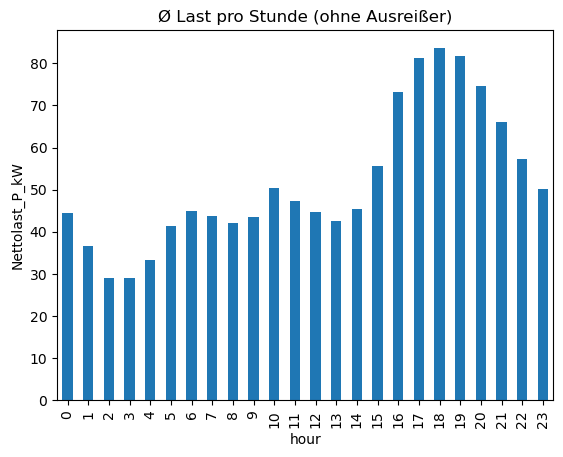

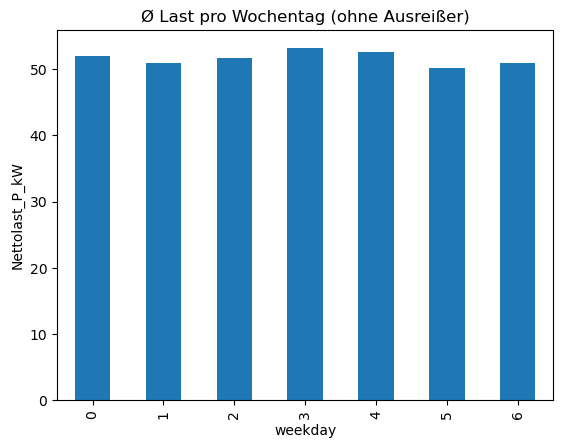

In [ ]:
# Gruppieren nach Stunde und Mittelwert berechnen (ohne Ausreißer)
df_no_outliers.groupby("hour")["Nettolast_P_kW"].mean().plot(
    kind="bar", title="Ø Last pro Stunde (ohne Ausreißer)"
)
plt.ylabel("Nettolast_P_kW")
plt.show()

# Gruppieren nach Wochentag und Mittelwert berechnen (ohne Ausreißer)
df_no_outliers.groupby("weekday")["Nettolast_P_kW"].mean().plot(
    kind="bar", title="Ø Last pro Wochentag (ohne Ausreißer)"
)
plt.ylabel("Nettolast_P_kW")
plt.show()

In [ ]:
# Ausreißer anhand des IQR entfernen
Q1 = df["Nettolast_P_kW"].quantile(0.25)
Q3 = df["Nettolast_P_kW"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df["Nettolast_P_kW"] >= lower) & (df["Nettolast_P_kW"] <= upper)]
print(df_no_outliers.shape)


(26666, 19)


<Axes: title={'center': 'Zeitverlauf der Last'}>

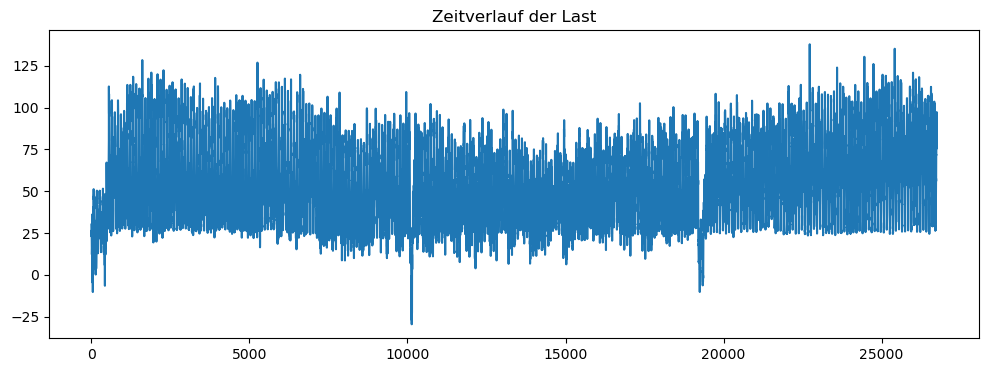

In [ ]:
df["Nettolast_P_kW"].plot(figsize=(12, 4), title="Zeitverlauf der Last")


In [ ]:
df.corr(numeric_only=True)["Nettolast_P_kW"].sort_values(ascending=False)


Nettolast_P_kW      1.000000
1-1:1290*255        0.826597
hour                0.567297
1-1:5290*255        0.566595
1-1:8290*255        0.534650
rre150h0            0.081803
weekday            -0.006296
1-1:7290*255       -0.010547
dkl010h0           -0.012011
fkl010h1           -0.018502
fkl010h0           -0.019579
is_weekend         -0.026213
1-1:6290*255       -0.146470
tre200h0           -0.168348
Nettolast_Q_kvar   -0.225185
gre000h0           -0.367674
1-1:2290*255       -0.380988
Name: Nettolast_P_kW, dtype: float64

<Axes: title={'center': 'Ø Last pro Wochentag'}, xlabel='weekday'>

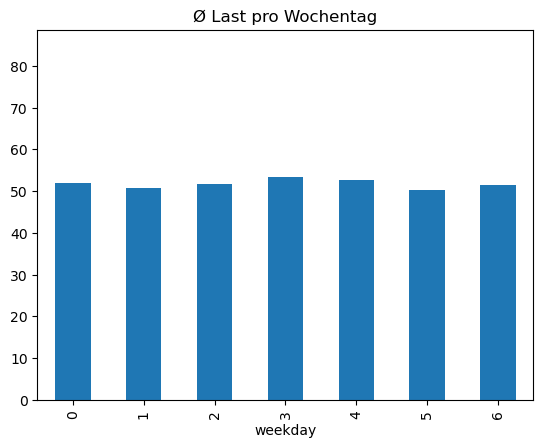

In [ ]:
df.groupby("hour")["Nettolast_P_kW"].mean().plot(kind="bar", title="Ø Last pro Stunde")
df.groupby("weekday")["Nettolast_P_kW"].mean().plot(kind="bar", title="Ø Last pro Wochentag")


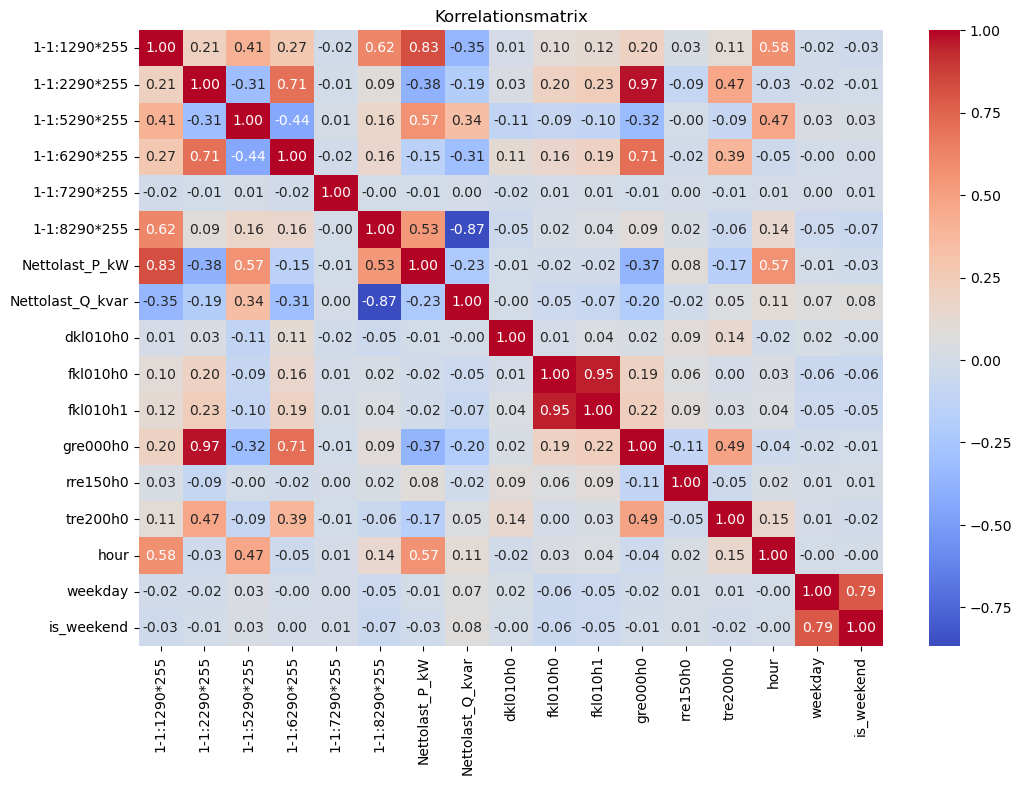

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()


<Axes: >

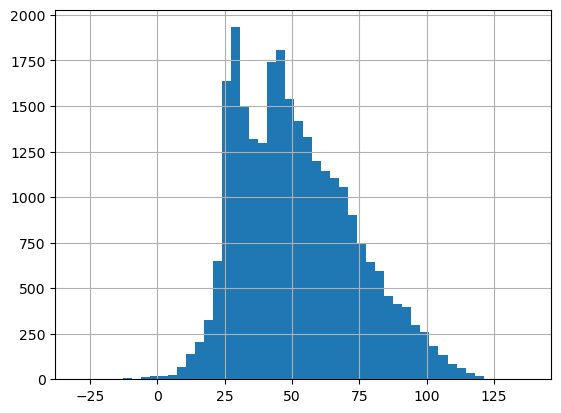

In [ ]:
df["Nettolast_P_kW"].hist(bins=50)


In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = "../data/eda_b4s_clean.csv"
df = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
df.head(), df.columns.tolist()


(                  time  1-1:1290*255  1-1:2290*255  1-1:5290*255  \
 0  2020-03-02 23:15:00         30014             0          2612   
 1  2020-03-02 23:30:00         27356             0          2538   
 2  2020-03-02 23:45:00         25930             0          2544   
 3  2020-03-03 00:00:00         24318             0          2432   
 4  2020-03-03 00:15:00         24300             0          2460   
 
    1-1:6290*255  1-1:7290*255  1-1:8290*255  Nettolast_P_kW  Nettolast_Q_kvar  \
 0             0             0          8200          30.014            -5.588   
 1             0             0          8322          27.356            -5.784   
 2             0             0          8302          25.930            -5.758   
 3             0             0          8296          24.318            -5.864   
 4             0             0          8082          24.300            -5.622   
 
    dkl010h0  fkl010h0  fkl010h1  gre000h0  rre150h0  tre200h0  hour  weekday  \
 0     24

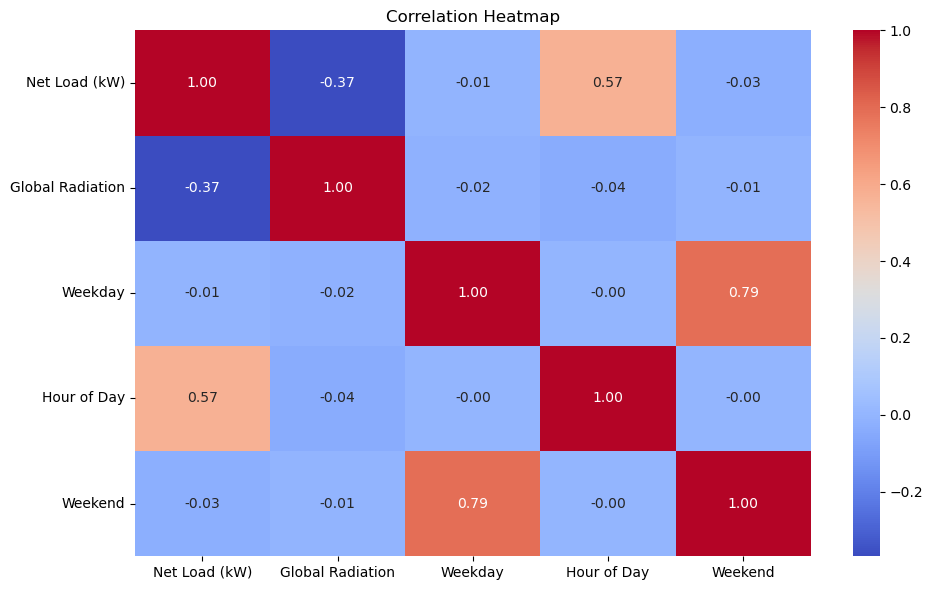

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relevante Spalten extrahieren und umbenennen
df_heatmap = df[[
    'Nettolast_P_kW',
    'gre000h0',
    'weekday',
    'hour',
    'is_weekend'
]].rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'gre000h0': 'Global Radiation',
    'weekday': 'Weekday',
    'hour': 'Hour of Day',
    'is_weekend': 'Weekend'
})

# Korrelationsmatrix berechnen
correlation_matrix = df_heatmap.corr()

# Heatmap zeichnen
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


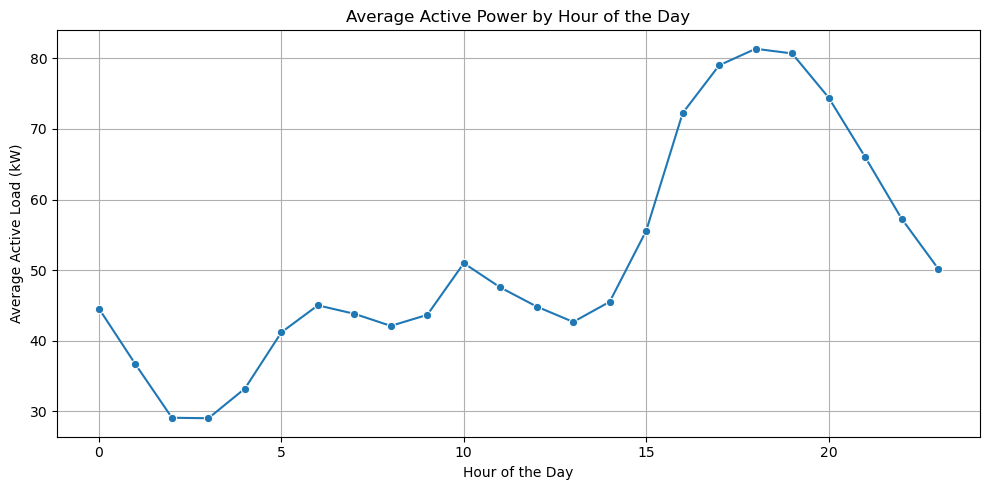

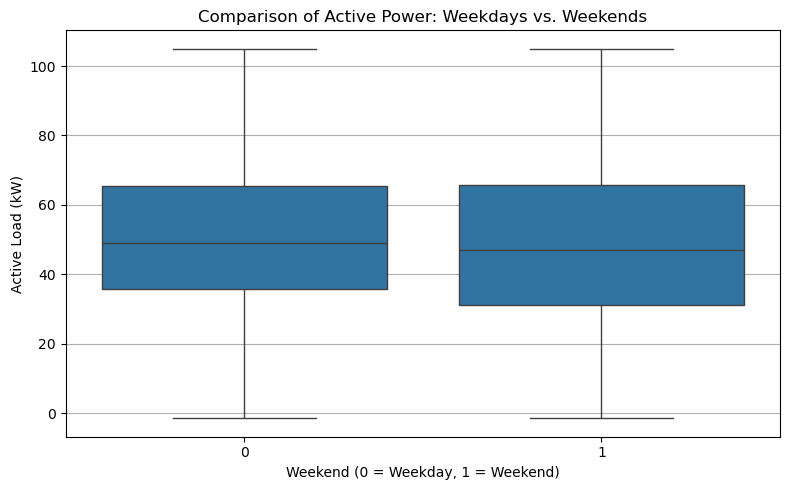

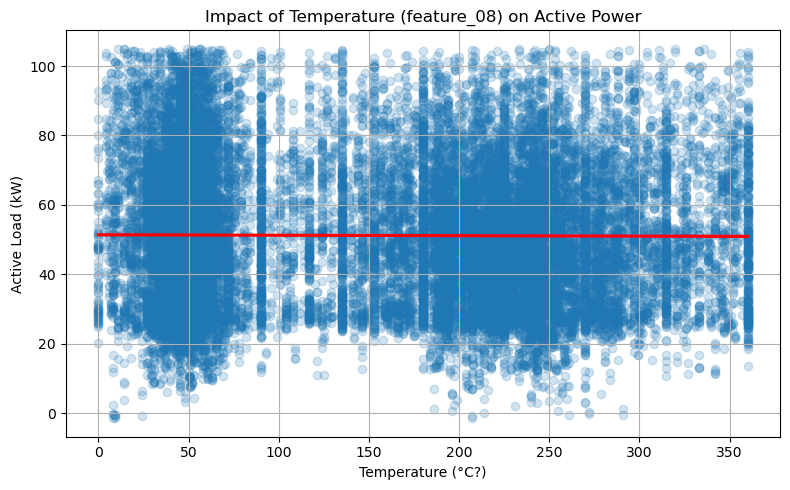

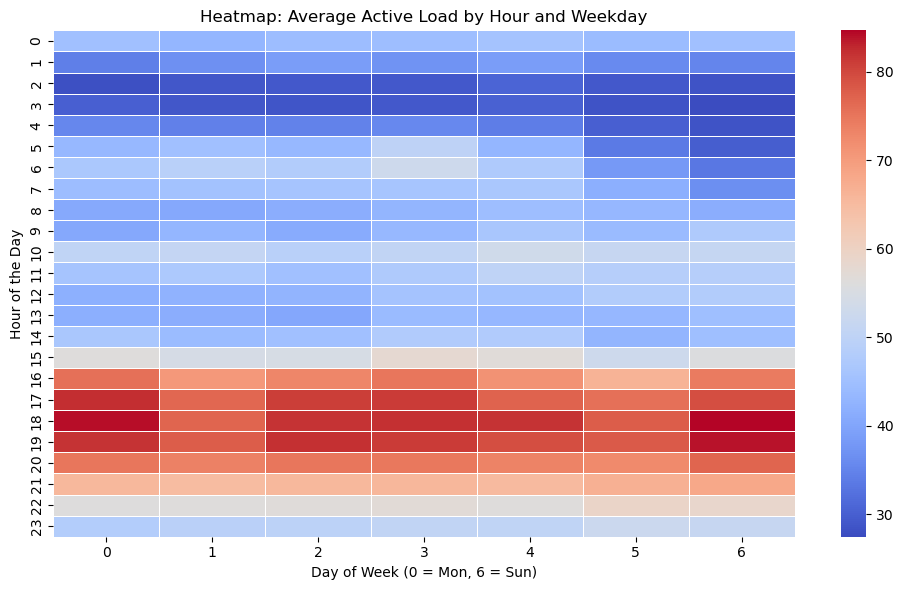

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Section 1: Average active power per hour
avg_hourly_load = df.groupby("hour")["Nettolast_P_kW"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_hourly_load.index, y=avg_hourly_load.values, marker="o")
plt.title("Average Active Power by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Active Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Section 2: Weekday vs. Weekend Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="is_weekend", y="Nettolast_P_kW")
plt.title("Comparison of Active Power: Weekdays vs. Weekends")
plt.xlabel("Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Active Load (kW)")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# Section 3: Impact of Temperature (feature_08) on Load
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="feature_08", y="Nettolast_P_kW", 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
plt.title("Impact of Temperature (feature_08) on Active Power")
plt.xlabel("Temperature (°C?)")
plt.ylabel("Active Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Section 4: Heatmap of Average Load by Hour and Day of Week
pivot_table = df.pivot_table(index="hour", columns="weekday", 
                              values="Nettolast_P_kW", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Active Load by Hour and Weekday")
plt.xlabel("Day of Week (0 = Mon, 6 = Sun)")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()


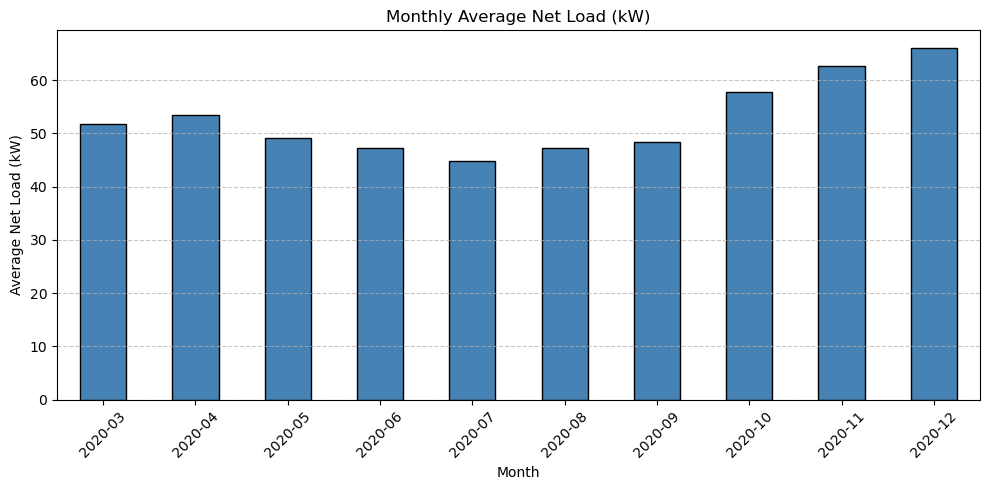

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 📥 CSV-Datei laden
df = pd.read_csv("../data/eda_b4s_clean.csv")
df["time"] = pd.to_datetime(df["time"])

# 📆 Monat extrahieren (als Format: z. B. "2021-07")
df["month"] = df["time"].dt.to_period("M").astype(str)

# 📊 Durchschnittlicher Verbrauch pro Monat
monthly_avg = df.groupby("month")["Nettolast_P_kW"].mean()

# 📈 Diagramm erstellen
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Monthly Average Net Load (kW)")
plt.xlabel("Month")
plt.ylabel("Average Net Load (kW)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
